### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
def capping(arr, k=3):
    ulimit = arr.mean() + k*arr.std()
    llimit = arr.mean() - k*arr.std()
    arr[arr<llimit] = llimit
    arr[arr>ulimit] = ulimit
    return arr

In [2]:
# Read data from train. csv file
telchurn = pd.read_csv("train.csv")

In [3]:
# Review top 10 rows of dataset
telchurn.head(10)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   
5   5        109             0.0             0.0             0.0   
6   6        109             0.0             0.0             0.0   
7   7        109             0.0             0.0             0.0   
8   8        109             0.0             0.0             0.0   
9   9        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   
5            6/30/2014            7/31/2014            8/31/2014   86.193   
6            6/30/2014            7/31/2014            8/31/2014   54.173   
7            6/30/2014            7/31/2014            8/31/2014  167.861   
8            6/30/2014            7/31/2014            8/31/2014  163.550   
9            6/30/2014            7/31/2014            8/31/2014  101.984   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   
5   83.351  ...            0            0        NaN        NaN        NaN   
6   95.130  ...            0            0        NaN        NaN        NaN   
7  167.869  ...            0            0        1.0        1.0        1.0   
8   90.250  ...            0            0        NaN        NaN        NaN   
9  259.265  ...            0            0        NaN        NaN        NaN   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958        0.00        0.00        0.00                  0  
1   710        0.00        0.00        0.00                  0  
2   882        0.00        0.00        0.00                  0  
3   982        0.00        0.00        0.00                  0  
4   647        0.00        0.00        0.00                  0  
5   698        0.00        0.00        0.00                  0  
6  1083        0.00        0.00        0.00                  0  
7   584       82.26       73.56      177.14                  0  
8  2455        0.00        0.00        0.00                  1  
9  2530        0.00        0.00        0.00                  0  

[10 rows x 172 columns]

In [4]:
# Check number of records, data types of variables in summary format
telchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 89.5+ MB


In [5]:
# statistics check of the data
telchurn.describe(include='all')

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7  ...   sachet_3g_7  \
count                 69266  69999.000000  69999.000000  ...  69999.000000   
unique                    1           NaN           NaN  ...           NaN   
top               8/31/2014           NaN           NaN  ...           NaN   
freq                  69266           NaN           NaN  ...           NaN   
mean                    NaN    283.134365    278.185912  ...      0.081444   
std                     NaN    334.213918    344.366927  ...      0.634547   
min                     NaN  -2258.709000  -1289.715000  ...      0.000000   
25%                     NaN     93.581000     86.714000  ...      0.000000   
50%                     NaN    197.484000    191.588000  ...      0.000000   
75%                     NaN    370.791000    365.369500  ...      0.000000   
max                     NaN  27731.088000  35145.834000  ...     33.000000   

         sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon  \
count   69999.000000  17568.000000  17865.000000  18417.000000  69999.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.085487      0.916325      0.909544      0.890319   1220.639709   
std         0.680035      0.276907      0.286842      0.312501    952.426321   
min         0.000000      0.000000      0.000000      0.000000    180.000000   
25%         0.000000      1.000000      1.000000      1.000000    468.000000   
50%         0.000000      1.000000      1.000000      1.000000    868.000000   
75%         0.000000      1.000000      1.000000      1.000000   1813.000000   
max        41.000000      1.000000      1.000000      1.000000   4337.000000   

          aug_vbc_3g    jul_vbc_3g   jun_vbc_3g  churn_probability  
count   69999.000000  69999.000000  69999.00000       69999.000000  
unique           NaN           NaN          NaN                NaN  
top              NaN           NaN          NaN                NaN  
freq             NaN           NaN          NaN                NaN  
mean       68.108597     65.935830     60.07674           0.101887  
std       269.328659    267.899034    257.22681           0.302502  
min         0.0

In [6]:
# create backup of data
backup = telchurn.copy()

In [7]:
# Column wise data types
telchurn.info(verbose =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
id                          int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float

In [8]:
# create column name list by types of columns

cats =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

ids = ['circle_id']

dates = [x for x in telchurn.columns if 'date' in x]


nums = [column for column in telchurn.columns if column not in cats+ ids + dates]


# Check number of columns in each list
print("ID columns:", len(ids))
print("Date columns:" , len(dates))
print("Categorical columns:" , len(cats))
print("Numerical columns:", len(nums))

ID columns: 1
Date columns: 9
Categorical columns: 6
Numerical columns: 156


### Check & handle missing values

In [9]:
# Missing value percentage in each column

telchurn.isnull().sum()*100/telchurn.shape[0]

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [10]:
# Select all recharge related columns
recharge = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

telchurn[recharge].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       17568.000000       17865.000000       18417.000000   
mean            2.467612           2.679989           2.652441   
std             2.794610           3.073472           3.101265   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           2.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     17568.000000     17865.000000     18417.000000     17568.000000   
mean          1.865323         2.056311         2.016018         0.602288   
std           2.566377         2.799916         2.728246         1.279297   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         1.000000         1.000000         0.000000   
50%           1.000000         1.000000         1.000000         0.000000   
75%           2.000000         2.000000         2.000000         1.000000   
max          42.000000        48.000000        44.000000        29.000000   

       count_rech_3g_7  count_rech_3g_8  max_rech_data_6  max_rech_data_7  \
count     17865.000000     18417.000000     17568.000000     17865.000000   
mean          0.623678         0.636423       126.500000       126.402071   
std           1.401230         1.457058       109.352573       109.459266   
min           0.000000         0.000000         1.000000         1.000000   
25%           0.000000         0.000000        25.000000        25.000000   
50%           0.000000         0.000000       145.000000       145.000000   
75%           1.000000         1.000000       177.000000       177.000000   
max          34.000000        45.000000      1555.000000      1555.000000   

       max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
count     18417.000000        17568.000000        17865.000000   
mean        125.374925          192.831096          201.455940   
std         109.648799          190.623115          198.346141   
min           1.000000            1.000000            1.000000   
25%          25.000000           82.000000           92.000000   
50%         145.000000          154.000000          154.000000   
75%         179.000000          252.000000          252.000000   
max        1555.000000         5920.000000         4365.000000   

       av_rech_amt_data_8  
count        18417.000000  
mean           196.815792  
std            192.280532  
min              1.000000  
25%             84.000000  
50%            154.000000  
75%            252.000000  
max           4076.000000

In [11]:
# Recharge date missing as well as recharge value missing = no recharge done by customer. View these cases
telchurn.loc[telchurn.total_rech_data_6.isnull() & telchurn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head()

total_rech_data_6 date_of_last_rech_data_6
0                NaN                      NaN
1                NaN                      NaN
2                NaN                      NaN
3                NaN                      NaN
5                NaN                      NaN

### For the recharge related variables above selecting those with minumum value = 1, imputing missing values with zeroes. Customer hasn't recharged for those months

In [12]:
# create a list of recharge columns where we will impute missing values with zeroes
zerolist = ['total_rech_data_6', 'av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_7', 'max_rech_data_7','total_rech_data_8', 'av_rech_amt_data_7', 'av_rech_amt_data_8' , 'max_rech_data_8']
# Fill with zeros
telchurn[zerolist] = telchurn[zerolist].apply(lambda x: x.fillna(0))

In [15]:
# Check the values after filling with zeros

print("    Ratio of missing values:\n", telchurn[zerolist].isnull().sum()*100/telchurn.shape[1])

print("Detailed statistics:\n" , telchurn[zerolist].describe(include='all'))

    Ratio of missing values:
 total_rech_data_6     0.0
av_rech_amt_data_6    0.0
max_rech_data_6       0.0
total_rech_data_7     0.0
max_rech_data_7       0.0
total_rech_data_8     0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_8       0.0
dtype: float64
Detailed statistics:
        total_rech_data_6  av_rech_amt_data_6  max_rech_data_6  \
count       69999.000000        69999.000000     69999.000000   
mean            0.619309           48.395787        31.748339   
std             1.762010          126.923180        77.519536   
min             0.000000            0.000000         0.000000   
25%             0.000000            0.000000         0.000000   
50%             0.000000            0.000000         0.000000   
75%             1.000000            8.000000         8.000000   
max            61.000000         5920.000000      1555.000000   

       total_rech_data_7  max_rech_data_7  total_rech_data_8  \
count       69999.000000     69999.000000       6

In [16]:
# Shape of dataframe
telchurn.shape

(69999, 172)

In [17]:
# circle id & dates to be dropped. Check shape after dropping

telchurn = telchurn.drop(['id','circle_id'], axis=1)
telchurn = telchurn.drop(dates, axis=1)

telchurn.shape

(69999, 162)

## ii) Replace NaN values in categorical variables

Replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [18]:
# For categorical columns identified earlier, fill missing values with -1
telchurn[cats] = telchurn[cats].apply(lambda x: x.fillna(-1))

In [19]:
print("Proportion of missing values:")
print(telchurn[cats].isnull().sum()*100/telchurn.shape[0])

Proportion of missing values:
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


## iii) Drop variables with more than a given threshold of missing values

In [20]:
# all columns stored into var colback
colback = telchurn.shape[1]

#list of columns having missing value less than given threshold : 70%

newcols = list(telchurn.apply(lambda column: True if column.isnull().sum()/telchurn.shape[0] < 0.7 else False))

temp = pd.DataFrame({'Columns':telchurn.columns , 'Flag': newcols})
temp.loc[temp.Flag == True,:]

Columns  Flag
0                   id  True
1       loc_og_t2o_mou  True
2       std_og_t2o_mou  True
3       loc_ic_t2o_mou  True
4               arpu_6  True
..                 ...   ...
157                aon  True
158         aug_vbc_3g  True
159         jul_vbc_3g  True
160         jun_vbc_3g  True
161  churn_probability  True

[150 rows x 2 columns]

In [21]:
# Drop the columns not meeting threshold criteria as filtered above

telchurn = telchurn.loc[:, newcols]

In [22]:
# number of columns are dropped
len(temp.loc[temp.Flag == 0,:])

12

In [23]:
# create column name list by types of columns

cats =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

ids = ['circle_id']

dates = [x for x in telchurn.columns if 'date' in x]


nums = [column for column in telchurn.columns if column not in cats+ ids + dates]


# Check number of columns in each list
print("ID columns:", len(ids))
print("Date columns:" , len(dates))
print("Categorical columns:" , len(cats))
print("Numerical columns:", len(nums))

ID columns: 1
Date columns: 0
Categorical columns: 6
Numerical columns: 144


In [24]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [25]:
#Missing value counts for each variable

telchurn.isnull().sum().sort_values(ascending = False)

std_og_t2c_mou_8      3703
isd_og_mou_8          3703
loc_og_t2c_mou_8      3703
loc_og_mou_8          3703
std_og_t2t_mou_8      3703
std_og_t2m_mou_8      3703
std_og_t2f_mou_8      3703
std_og_mou_8          3703
ic_others_8           3703
isd_ic_mou_8          3703
spl_ic_mou_8          3703
std_ic_mou_8          3703
loc_og_t2m_mou_8      3703
std_ic_t2o_mou_8      3703
std_ic_t2f_mou_8      3703
std_ic_t2m_mou_8      3703
std_ic_t2t_mou_8      3703
loc_ic_mou_8          3703
loc_ic_t2f_mou_8      3703
loc_ic_t2m_mou_8      3703
loc_ic_t2t_mou_8      3703
spl_og_mou_8          3703
loc_og_t2f_mou_8      3703
og_others_8           3703
onnet_mou_8           3703
loc_og_t2t_mou_8      3703
roam_ic_mou_8         3703
roam_og_mou_8         3703
offnet_mou_8          3703
roam_ic_mou_6         2768
std_og_mou_6          2768
std_ic_t2t_mou_6      2768
spl_og_mou_6          2768
std_ic_t2m_mou_6      2768
ic_others_6           2768
isd_ic_mou_6          2768
std_og_t2c_mou_6      2768
o

### Impute zeros 

If outgoing call,minutes use are  missing means there is zero outgoing call

In [26]:
imputelist = ['loc_og_mou_8','loc_og_t2t_mou_8','loc_og_t2f_mou_8','std_ic_t2o_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8','std_ic_t2f_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_t2c_mou_8','std_ic_t2m_mou_8','std_og_mou_8','isd_og_mou_8','std_ic_t2t_mou_8','spl_og_mou_8','og_others_8','loc_ic_mou_8','loc_ic_t2f_mou_8','loc_ic_t2t_mou_8','loc_og_t2m_mou_8','loc_ic_t2m_mou_8','std_ic_mou_8','roam_og_mou_8','spl_ic_mou_8','onnet_mou_8','roam_ic_mou_8','isd_ic_mou_8','offnet_mou_8','ic_others_8','std_ic_t2t_mou_6','ic_others_6','og_others_6','onnet_mou_6','std_og_t2c_mou_6','isd_ic_mou_6','std_ic_t2m_mou_6','isd_og_mou_6','loc_ic_mou_6','offnet_mou_6','std_og_mou_6','loc_ic_t2m_mou_6','loc_og_t2m_mou_6','spl_og_mou_6','std_ic_t2f_mou_6','roam_og_mou_6','loc_og_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','std_ic_mou_6','loc_og_t2c_mou_6','spl_ic_mou_6','std_og_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2f_mou_6','std_og_t2t_mou_6','std_ic_t2o_mou_6','std_og_t2m_mou_6','roam_ic_mou_6','std_ic_t2o_mou_7','isd_ic_mou_7','std_ic_t2t_mou_7','loc_ic_mou_7','spl_ic_mou_7','ic_others_7','std_ic_mou_7','loc_ic_t2f_mou_7','std_ic_t2f_mou_7','std_ic_t2m_mou_7','loc_ic_t2m_mou_7','std_og_t2m_mou_7','loc_ic_t2t_mou_7','onnet_mou_7','offnet_mou_7','roam_ic_mou_7','roam_og_mou_7','loc_og_t2t_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7','std_og_t2t_mou_7','loc_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','std_og_t2c_mou_7','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','loc_ic_t2o_mou']

In [27]:
#var data types
for l in imputelist:
    print(telchurn[l].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [28]:
# Mean Imputation for missing values
for im in imputelist:
    telchurn[im] = telchurn[im].fillna(telchurn[im].mean())

telchurn.head(3)

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  arpu_6   arpu_7  \
0   0             0.0             0.0             0.0  31.277   87.009   
1   1             0.0             0.0             0.0   0.000  122.787   
2   2             0.0             0.0             0.0  60.806  103.176   

   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0   7.527        48.58       124.38         1.29         32.24         96.68   
1  42.953         0.00         0.00         0.00          0.00         25.99   
2   0.000         0.53        15.93         0.00         53.99         82.05   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          2.33            0.0            0.0            0.0            0.0   
1         30.89            0.0            0.0            0.0            0.0   
2          0.00            0.0            0.0            0.0            0.0   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0            0.0              2.23              0.00   
1            0.0            0.0              0.00              0.00   
2            0.0            0.0              0.53             12.98   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.28              5.29             16.04              2.33   
1              0.00              0.00              0.00              0.00   
2              0.00             24.11              0.00              0.00   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0               0.0               0.0               0.0              0.00   
1               0.0               0.0               0.0              0.00   
2               0.0               0.0               0.0              2.14   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              0.00              0.00          7.53         16.04   
1             22.01             29.79          0.00          0.00   
2              0.00              0.00         24.64         12.98   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0          2.61             46.34            124.38              1.01   
1          0.00              0.00              0.00              0.00   
2          0.00              0.00              2.94              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0             18.75             80.61               0.0               0.0   
1              0.00              0.00               0.0               0.0   
2             28.94             82.05               0.0               0.0   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   

   std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0               0.0         65.09        204.99          1.01           0.0   
1               0.0          0.00          0.00          0.00           0.0   
2               0.0         28.94         84.99          0.00           0.0   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          8.20          0.63          0.00   
1           0.0           0.0          0.00         30.73         31.66   
2           0.0           0.0          2.89          1.38          0.00   

   og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0         0.38          0.0          0.0           81.21          221.68   
1         0.00          0.0          0.0            0.00           30.73   
2         0.00          0.0          0.0           56.49           99.36   

   total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7 

In [29]:
#Checking missing values after imputation
telchurn.isnull().sum().sort_values(ascending = False)

churn_probability     0
og_others_6           0
spl_og_mou_7          0
spl_og_mou_6          0
isd_og_mou_8          0
isd_og_mou_7          0
isd_og_mou_6          0
std_og_mou_8          0
std_og_mou_7          0
std_og_mou_6          0
std_og_t2c_mou_8      0
std_og_t2c_mou_7      0
std_og_t2c_mou_6      0
std_og_t2f_mou_8      0
std_og_t2f_mou_7      0
std_og_t2f_mou_6      0
std_og_t2m_mou_8      0
spl_og_mou_8          0
og_others_7           0
std_og_t2m_mou_6      0
og_others_8           0
loc_ic_mou_8          0
loc_ic_mou_7          0
loc_ic_mou_6          0
loc_ic_t2f_mou_8      0
loc_ic_t2f_mou_7      0
loc_ic_t2f_mou_6      0
loc_ic_t2m_mou_8      0
loc_ic_t2m_mou_7      0
loc_ic_t2m_mou_6      0
loc_ic_t2t_mou_8      0
loc_ic_t2t_mou_7      0
loc_ic_t2t_mou_6      0
total_og_mou_8        0
total_og_mou_7        0
total_og_mou_6        0
std_og_t2m_mou_7      0
std_og_t2t_mou_8      0
jun_vbc_3g            0
roam_og_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_7   

### calculate total data recharge amount

In [30]:
# For month 6 & 7 the recharge amout is as follows: 
telchurn['total_rech_m6'] = telchurn.total_rech_data_6 * telchurn.av_rech_amt_data_6
telchurn['total_rech_m7'] = telchurn.total_rech_data_7 * telchurn.av_rech_amt_data_7

### Total data + total recharge=total amount

In [31]:
# calculate total recharge amount for June & July --> call recharge amount + data recharge amount
telchurn['amount_d_6'] = telchurn.total_rech_amt_6 + telchurn.total_rech_m6
telchurn['amount_d_7'] = telchurn.total_rech_amt_7 + telchurn.total_rech_m7

In [32]:
# calculate average recharge done by customer in June & July
telchurn['avg_amt_67'] = (telchurn.amount_d_6 + telchurn.amount_d_7)/2

In [33]:
# Recharge amount threshold at 70th percentile

telchurn.avg_amt_67.quantile(0.7)

477.5

In [34]:
# Filter & select those customers  only who meet the high value customer criteria (>70th percentile amount)
telchurn_highval = telchurn.loc[telchurn.avg_amt_67 >= telchurn.avg_amt_67.quantile(0.7), :]
telchurn_highval = telchurn_highval.reset_index(drop=True)
telchurn_highval.shape

(21013, 155)

In [35]:
# delete variables created to filter high-value customers to avoid redendancy
telchurn_highval = telchurn_highval.drop(['total_rech_m6', 'total_rech_m7', 'amount_d_6', 'amount_d_7', 'avg_amt_67'], axis=1)
telchurn_highval.shape

(21013, 150)

In [36]:
#After mean imputation and drop the redendant vars check the missing ocunts
telchurn_highval.isnull().sum().sort_values(ascending = False)

churn_probability     0
og_others_6           0
spl_og_mou_7          0
spl_og_mou_6          0
isd_og_mou_8          0
isd_og_mou_7          0
isd_og_mou_6          0
std_og_mou_8          0
std_og_mou_7          0
std_og_mou_6          0
std_og_t2c_mou_8      0
std_og_t2c_mou_7      0
std_og_t2c_mou_6      0
std_og_t2f_mou_8      0
std_og_t2f_mou_7      0
std_og_t2f_mou_6      0
std_og_t2m_mou_8      0
spl_og_mou_8          0
og_others_7           0
std_og_t2m_mou_6      0
og_others_8           0
loc_ic_mou_8          0
loc_ic_mou_7          0
loc_ic_mou_6          0
loc_ic_t2f_mou_8      0
loc_ic_t2f_mou_7      0
loc_ic_t2f_mou_6      0
loc_ic_t2m_mou_8      0
loc_ic_t2m_mou_7      0
loc_ic_t2m_mou_6      0
loc_ic_t2t_mou_8      0
loc_ic_t2t_mou_7      0
loc_ic_t2t_mou_6      0
total_og_mou_8        0
total_og_mou_7        0
total_og_mou_6        0
std_og_t2m_mou_7      0
std_og_t2t_mou_8      0
jun_vbc_3g            0
roam_og_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_7   

### Difference between average of (month 6 & 7) and month 8 values 

In [37]:
telchurn_highval['arpu_diff'] = telchurn_highval.arpu_8 - ((telchurn_highval.arpu_6 + telchurn_highval.arpu_7)/2)

telchurn_highval['onnet_mou_diff'] = telchurn_highval.onnet_mou_8 - ((telchurn_highval.onnet_mou_6 + telchurn_highval.onnet_mou_7)/2)

telchurn_highval['offnet_mou_diff'] = telchurn_highval.offnet_mou_8 - ((telchurn_highval.offnet_mou_6 + telchurn_highval.offnet_mou_7)/2)

telchurn_highval['roam_ic_mou_diff'] = telchurn_highval.roam_ic_mou_8 - ((telchurn_highval.roam_ic_mou_6 + telchurn_highval.roam_ic_mou_7)/2)

telchurn_highval['roam_og_mou_diff'] = telchurn_highval.roam_og_mou_8 - ((telchurn_highval.roam_og_mou_6 + telchurn_highval.roam_og_mou_7)/2)

telchurn_highval['loc_og_mou_diff'] = telchurn_highval.loc_og_mou_8 - ((telchurn_highval.loc_og_mou_6 + telchurn_highval.loc_og_mou_7)/2)

telchurn_highval['std_og_mou_diff'] = telchurn_highval.std_og_mou_8 - ((telchurn_highval.std_og_mou_6 + telchurn_highval.std_og_mou_7)/2)

telchurn_highval['isd_og_mou_diff'] = telchurn_highval.isd_og_mou_8 - ((telchurn_highval.isd_og_mou_6 + telchurn_highval.isd_og_mou_7)/2)

telchurn_highval['spl_og_mou_diff'] = telchurn_highval.spl_og_mou_8 - ((telchurn_highval.spl_og_mou_6 + telchurn_highval.spl_og_mou_7)/2)

telchurn_highval['total_og_mou_diff'] = telchurn_highval.total_og_mou_8 - ((telchurn_highval.total_og_mou_6 + telchurn_highval.total_og_mou_7)/2)

telchurn_highval['loc_ic_mou_diff'] = telchurn_highval.loc_ic_mou_8 - ((telchurn_highval.loc_ic_mou_6 + telchurn_highval.loc_ic_mou_7)/2)

telchurn_highval['std_ic_mou_diff'] = telchurn_highval.std_ic_mou_8 - ((telchurn_highval.std_ic_mou_6 + telchurn_highval.std_ic_mou_7)/2)

telchurn_highval['isd_ic_mou_diff'] = telchurn_highval.isd_ic_mou_8 - ((telchurn_highval.isd_ic_mou_6 + telchurn_highval.isd_ic_mou_7)/2)

telchurn_highval['spl_ic_mou_diff'] = telchurn_highval.spl_ic_mou_8 - ((telchurn_highval.spl_ic_mou_6 + telchurn_highval.spl_ic_mou_7)/2)

telchurn_highval['total_ic_mou_diff'] = telchurn_highval.total_ic_mou_8 - ((telchurn_highval.total_ic_mou_6 + telchurn_highval.total_ic_mou_7)/2)

telchurn_highval['total_rech_num_diff'] = telchurn_highval.total_rech_num_8 - ((telchurn_highval.total_rech_num_6 + telchurn_highval.total_rech_num_7)/2)

telchurn_highval['total_rech_amt_diff'] = telchurn_highval.total_rech_amt_8 - ((telchurn_highval.total_rech_amt_6 + telchurn_highval.total_rech_amt_7)/2)

telchurn_highval['max_rech_amt_diff'] = telchurn_highval.max_rech_amt_8 - ((telchurn_highval.max_rech_amt_6 + telchurn_highval.max_rech_amt_7)/2)

telchurn_highval['total_rech_data_diff'] = telchurn_highval.total_rech_data_8 - ((telchurn_highval.total_rech_data_6 + telchurn_highval.total_rech_data_7)/2)

telchurn_highval['max_rech_data_diff'] = telchurn_highval.max_rech_data_8 - ((telchurn_highval.max_rech_data_6 + telchurn_highval.max_rech_data_7)/2)

telchurn_highval['av_rech_amt_data_diff'] = telchurn_highval.av_rech_amt_data_8 - ((telchurn_highval.av_rech_amt_data_6 + telchurn_highval.av_rech_amt_data_7)/2)

telchurn_highval['vol_2g_mb_diff'] = telchurn_highval.vol_2g_mb_8 - ((telchurn_highval.vol_2g_mb_6 + telchurn_highval.vol_2g_mb_7)/2)

telchurn_highval['vol_3g_mb_diff'] = telchurn_highval.vol_3g_mb_8 - ((telchurn_highval.vol_3g_mb_6 + telchurn_highval.vol_3g_mb_7)/2)

In [38]:
# summary of derived var -- just a sample check

telchurn_highval['total_og_mou_diff'].describe()

count    21013.000000
mean       -68.437759
std        502.233995
min      -7213.410000
25%       -169.295000
50%        -13.985000
75%         68.485000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [39]:
#missing value check for all these vars
telchurn_highval.isnull().sum().sort_values(ascending = False)

vol_3g_mb_diff           0
spl_og_mou_7             0
loc_ic_t2t_mou_6         0
total_og_mou_8           0
total_og_mou_7           0
total_og_mou_6           0
og_others_8              0
og_others_7              0
og_others_6              0
spl_og_mou_8             0
spl_og_mou_6             0
loc_ic_t2t_mou_8         0
isd_og_mou_8             0
isd_og_mou_7             0
isd_og_mou_6             0
std_og_mou_8             0
std_og_mou_7             0
std_og_mou_6             0
std_og_t2c_mou_8         0
std_og_t2c_mou_7         0
loc_ic_t2t_mou_7         0
loc_ic_t2m_mou_6         0
std_ic_mou_6             0
std_ic_t2t_mou_8         0
std_ic_t2o_mou_7         0
std_ic_t2o_mou_6         0
std_ic_t2f_mou_8         0
std_ic_t2f_mou_7         0
std_ic_t2f_mou_6         0
std_ic_t2m_mou_8         0
std_ic_t2m_mou_7         0
std_ic_t2m_mou_6         0
std_ic_t2t_mou_7         0
loc_ic_t2m_mou_7         0
std_ic_t2t_mou_6         0
loc_ic_mou_8             0
loc_ic_mou_7             0
l

## Univariate EDA

In [41]:
numdf_high = telchurn_highval.select_dtypes(exclude ="object")
numdf_high.head(3)
numdf_high.shape

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7  \
0   4             0.0             0.0             0.0   240.708  128.191   
1  15             0.0             0.0             0.0   580.549  377.294   
2  23             0.0             0.0             0.0  1130.948  905.506   

    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0  101.565        21.28         4.83         6.13         56.99         38.11   
1  338.286        10.43        24.99       194.43        317.11        341.79   
2  479.762       859.53       372.71         0.89        293.46        450.11   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          9.63          53.64            0.0            0.0          15.73   
1        197.09           0.00            0.0            0.0           0.00   
2        386.91           0.00            0.0            0.0           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0            0.0             10.16              4.83   
1            0.0            0.0             10.43             24.99   
2            0.0            0.0            859.53            372.71   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              6.13             36.74             19.88              4.61   
1            194.43            313.76            330.88            185.88   
2              0.89             79.79            424.63            378.01   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0             11.99              1.23              5.01               0.0   
1              3.26             10.91              4.94               0.0   
2             11.58             25.43              8.88               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              9.85               0.0         58.91         25.94   
1              0.00               0.0        327.46        366.79   
2              0.00               0.0        950.91        822.78   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0         15.76               0.0               0.0               0.0   
1        385.26               0.0               0.0               0.0   
2        387.79               0.0               0.0               0.0   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              4.35               0.0               0.0               0.0   
1              0.00               0.0               0.0               0.0   
2            202.08               0.0               0.0               0.0   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  \
0               0.0              0.00               0.0               0.0   
1               0.0              6.26               0.0               0.0   
2               0.0              0.00               0.0               0.0   

   std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0               0.0          4.35           0.0          0.00           0.0   
1               0.0          0.00           0.0          6.26           0.0   
2               0.0        202.08           0.0          0.00           0.0   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          0.00         17.00          0.00   
1           0.0           0.0          0.08          0.00          0.00   
2           0.0           0.0          0.00          0.05          0.01   

   og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0          0.0          0.0          0.0           63.26           42.94   
1          0.1          0.0          0.0          327.64          366.79   
2          0.0          0.0          0.0         1152.99          822.83   

   total_og_mou_8  loc_ic_t2t_mou_6  loc_i

(21013, 173)

In [42]:
#check the percentages of churn and non churn data -- data is imbalance 
numdf_high["churn_probability"].value_counts(normalize=True)

0    0.917242
1    0.082758
Name: churn_probability, dtype: float64

Data is imbalance only 8% are churned

### Exploratory Data analysis -- Visualiation

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Churn & Non-Churn distributions in percentage')

Text(0, 0.5, 'Percentages')

Text(0.5, 0, '0-NonChurn        1- Churn')

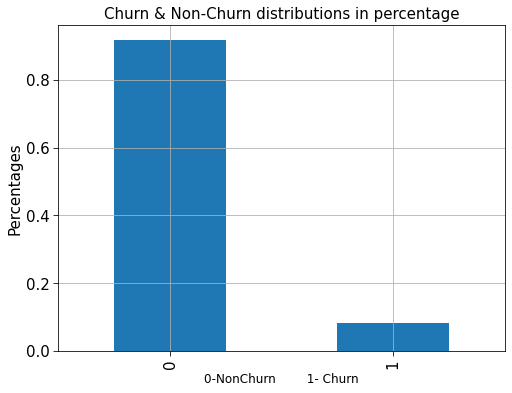

In [45]:
# plot to Check percetanges of churn and non churn data
plt.figure(figsize=(8,6))
numdf_high["churn_probability"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 15) 
plt.title("Churn & Non-Churn distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
plt.xlabel("0-NonChurn        1- Churn",fontsize=12)
plt.grid(0.4)
plt.show()

In [51]:
numdf_high.drop(['id'], axis=1,inplace=True) # drop id var


In [52]:
#check the summary stats
numdf_high.describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6  \
count         21013.0         21013.0         21013.0  21013.000000   
mean              0.0             0.0             0.0    558.458938   
std               0.0             0.0             0.0    474.147345   
min               0.0             0.0             0.0  -2258.709000   
25%               0.0             0.0             0.0    307.718000   
50%               0.0             0.0             0.0    482.616000   
75%               0.0             0.0             0.0    700.552000   
max               0.0             0.0             0.0  27731.088000   

             arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count  21013.000000  21013.000000  21013.000000  21013.000000  21013.000000   
mean     558.729577    506.861525    265.068034    270.456370    239.402327   
std      494.844437    519.951307    463.431697    485.070655    462.844350   
min    -1289.715000   -945.808000      0.000000      0.000000      0.000000   
25%      308.673000    230.471000     20.040000     18.790000     15.330000   
50%      479.725000    427.575000     92.890000     90.860000     80.790000   
75%      697.076000    658.704000    289.360000    288.730000    238.040000   
max    35145.834000  33543.624000   7376.710000   8157.780000  10752.560000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count  21013.000000  21013.000000  21013.000000    21013.00000   21013.000000   
mean     380.066440    381.481181    342.700449       16.26936      12.952923   
std      479.217863    489.783888    473.107856       77.43366      77.712043   
min        0.000000      0.000000      0.000000        0.00000       0.000000   
25%       81.610000     78.710000     63.310000        0.00000       0.000000   
50%      224.080000    219.430000    196.543577        0.00000       0.000000   
75%      492.910000    496.810000    436.840000        0.00000       0.000000   
max     8362.360000   7043.980000  14007.340000     2613.31000    3813.290000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count   21013.000000   21013.000000   21013.000000   21013.000000   
mean       12.348779      27.552531      20.506605      19.659557   
std        72.670020     119.910402      96.392954     104.444037   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3775.110000    2812.040000    5337.040000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count      21013.000000      21013.000000      21013.000000      21013.000000   
mean          84.902822         86.067171         79.499079        164.473370   
std          229.127629        242.041950        231.177198        247.697238   
min            0.000000          0.000000          0.000000          0.000000   
25%            5.310000          5.490000          4.390000         21.980000   
50%           26.730000         26.890000         25.610000         83.530000   
75%           77.680000         77.790000         71.230000        207.480000   
max         6431.330000       7400.660000      10752.560000       4696.830000   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      21013.000000      21013.000000      21013.000000      21013.000000   
mean         162.837625        153.595881          6.327169          6.412592   
std          234.092073        226.285416         20.176137         20.457885   
min            0.000000          0.000000          0.000000          0.000000   
25%           23.260000         19.130000          0.000000          0.000000   
50%           84.360000         81.630000          0.250000          0.280000   
75%   

Text(0.5, 1.0, 'Average revenue per user in month 6,7,8')

Text(0, 0.5, 'Median revenue')

Text(0.5, 0, 'Churn type')

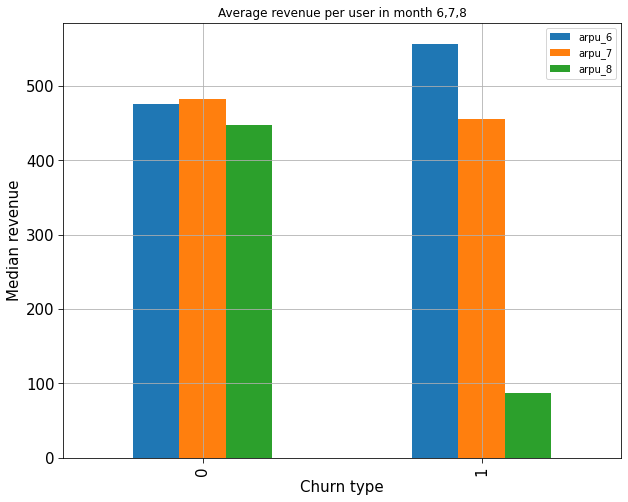

In [53]:
# Visualize the revenue
numdf_high.groupby("churn_probability")["arpu_6","arpu_7","arpu_8"].median().plot.bar(figsize=[10,8])
plt.title("Average revenue per user in month 6,7,8",fontsize=12)
plt.tick_params(size=5,labelsize = 15) 
plt.ylabel("Median revenue",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

Revenue are dropped from month 6 to 8 for churn customer

Text(0.5, 1.0, 'Minutes of usage inside network in month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

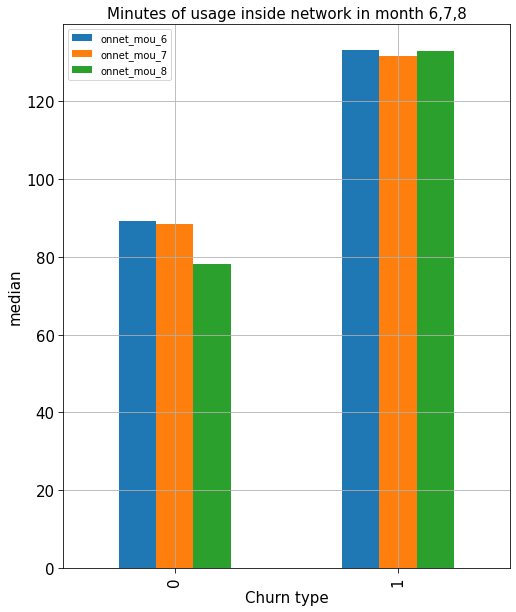

In [55]:
## Plot  onnet_mou
numdf_high.groupby("churn_probability")["onnet_mou_6","onnet_mou_7","onnet_mou_8" ].median().plot.bar(figsize=[8,10])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage inside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

There is no clear trend as such as for month 6, 7 and 8

Text(0.5, 1.0, 'Minutes of usage outside network in month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

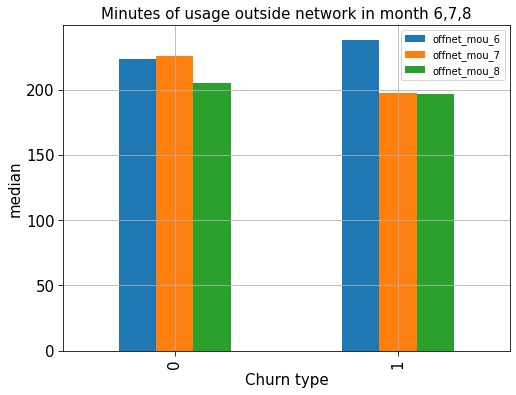

In [56]:
# Plot to visualize  offnet_mou
numdf_high.groupby("churn_probability")["offnet_mou_6","offnet_mou_7","offnet_mou_8" ].median().plot.bar(figsize=[8,6])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Minutes of usage outside network in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()


Minutes of usage outside network usage is lower for customer who are likely to churn

Text(0.5, 1.0, 'Total Recharge amount in month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

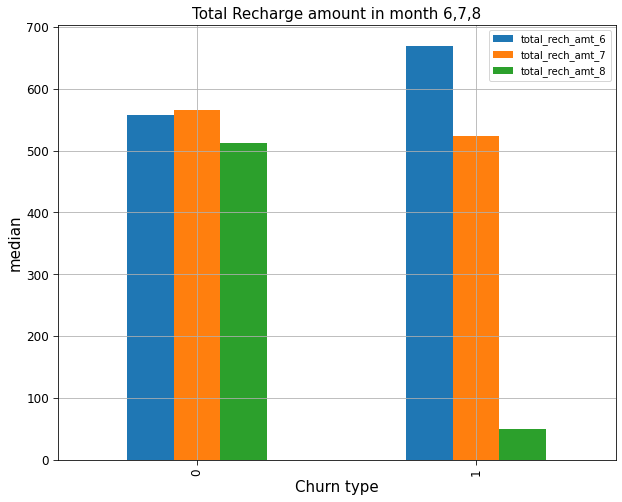

In [58]:
# visualize total_rech_amt
numdf_high.groupby("churn_probability")["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8" ].median().plot.bar(figsize=[10,8])
plt.tick_params(size=5,labelsize = 12) 
plt.title("Total Recharge amount in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Total recharge amounts are decreasing from 6 to 8 month for churn customer

Text(0.5, 1.0, 'Total Recharge data in month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

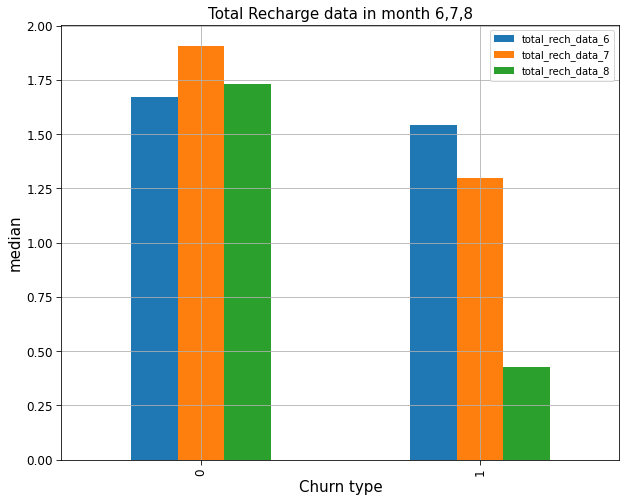

In [61]:
# Plot  total_rech_data_
numdf_high.groupby("churn_probability")["total_rech_data_6","total_rech_data_7","total_rech_data_8" ].mean().plot.bar(figsize=[10,8])
plt.tick_params(size=5,labelsize = 12) 
plt.title("Total Recharge data in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- There is cear indication as the total recharge amount decreses the customer is more likely to churn-- 

Text(0.5, 1.0, '2G recharge in month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

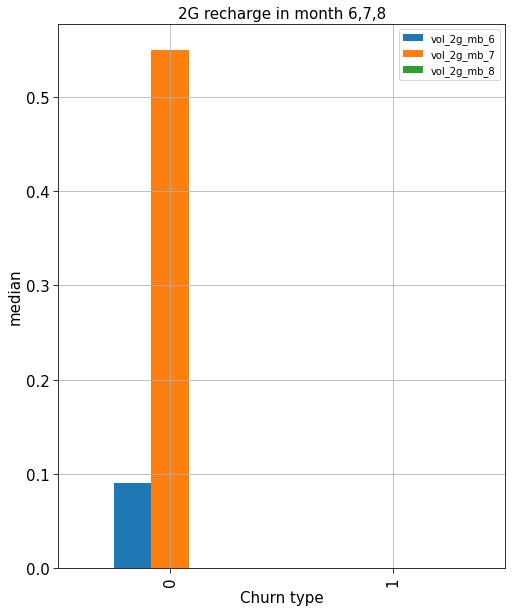

In [62]:
## Plot to visualize vol_2g_mb_6
numdf_high.groupby("churn_probability")["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8" ].median().plot.bar(figsize=[8,10])
plt.tick_params(size=5,labelsize = 15) 
plt.title("2G recharge in month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- 2G Rescharge is not having any evidence of churn

In [63]:
cats

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

night_pck_user_8        -1.0        0.0        1.0
churn_probability                                 
0                  85.772399  96.956124  97.083333
1                  14.227601   3.043876   2.916667

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

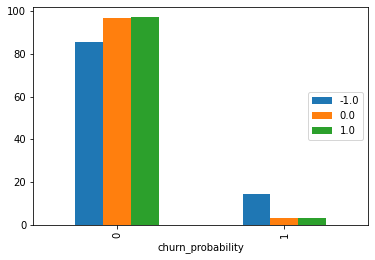

In [68]:
#Check the percenatges of churn in each category of Night Pack Users in month 8
nght_pk_usr_8=pd.crosstab(numdf_high.churn_probability, numdf_high.night_pck_user_8, normalize='columns')*100
nght_pk_usr_8
plt.figure(figsize=(4,4))
nght_pk_usr_8.plot.bar(stacked=False)
plt.legend(loc='right')


- those who have not used night pack on 8th month are more likely to churn

### Categorical Data Analysis - - Bivariate analysis

night_pck_user_7        -1.0        0.0       1.0
churn_probability                                
0                  88.299978  94.349506  93.79562
1                  11.700022   5.650494   6.20438

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

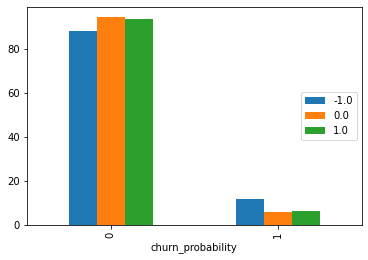

In [69]:
#Check the percenatges of churn in each category of Night Pack Users in month 7
nght_pk_usr_7=pd.crosstab(numdf_high.churn_probability, numdf_high.night_pck_user_7, normalize='columns')*100
nght_pk_usr_7
plt.figure(figsize=(4,4))
nght_pk_usr_7.plot.bar(stacked=False)
plt.legend(loc='right')

night_pck_user_6        -1.0        0.0        1.0
churn_probability                                 
0                  90.007505  93.189587  89.169675
1                   9.992495   6.810413  10.830325

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

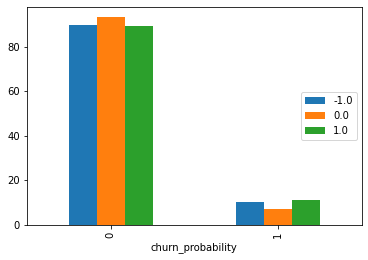

In [72]:
#Check the percenatges of churn in each category of Night Pack Users in month 6
nght_pk_usr_6=pd.crosstab(numdf_high.churn_probability, numdf_high.night_pck_user_6, normalize='columns')*100
nght_pk_usr_6
plt.figure(figsize=(4,4))
nght_pk_usr_6.plot.bar(stacked=False)
plt.legend(loc='right')

- There is no evidence of churn for night pack usage for 6th month 

fb_user_8               -1.0        0.0        1.0
churn_probability                                 
0                  85.772399  92.307692  97.502498
1                  14.227601   7.692308   2.497502

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

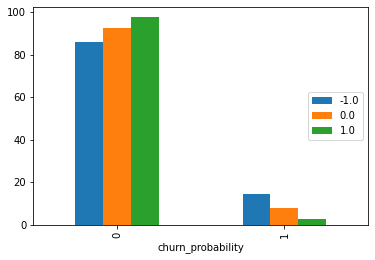

In [73]:
#Check the percenatges of churn in each category of Facebook user for 8th month
fb_usr_8=pd.crosstab(numdf_high.churn_probability, numdf_high.fb_user_8, normalize='columns')*100
fb_usr_8
plt.figure(figsize=(4,4))
fb_usr_8.plot.bar(stacked=False)
plt.legend(loc='right')

- High usage of FB are less likely to be churn and vice versa

fb_user_8               -1.0        0.0        1.0
churn_probability                                 
0                  85.772399  92.307692  97.502498
1                  14.227601   7.692308   2.497502

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

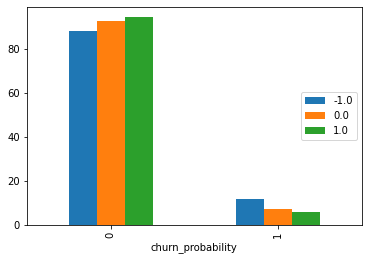

In [74]:
#Check the percenatges of churn in each category of Facebook user for 7th month
fb_usr_7=pd.crosstab(numdf_high.churn_probability, numdf_high.fb_user_7, normalize='columns')*100
fb_usr_8
plt.figure(figsize=(4,4))
fb_usr_7.plot.bar(stacked=False)
plt.legend(loc='right')

- missing and zero fb user are less likely to churn for 7th month

fb_user_8               -1.0        0.0        1.0
churn_probability                                 
0                  85.772399  92.307692  97.502498
1                  14.227601   7.692308   2.497502

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

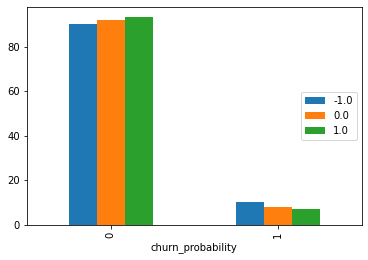

In [75]:
#Check the percenatges of churn in each category of Facebook user for 6th month
fb_usr_6=pd.crosstab(numdf_high.churn_probability, numdf_high.fb_user_6, normalize='columns')*100
fb_usr_8
plt.figure(figsize=(4,4))
fb_usr_6.plot.bar(stacked=False)
plt.legend(loc='right')

 Visualize the Recharge Amount 

Text(0.5, 1.0, 'Average recharge amount in  month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

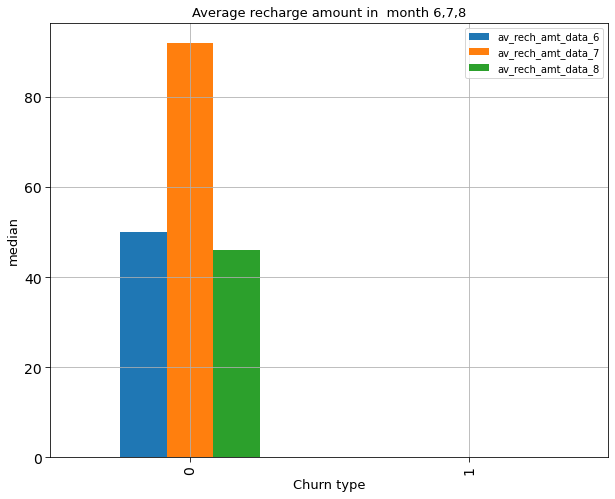

In [76]:
# plot to visualize av_rech_amt_data
numdf_high.groupby("churn_probability")["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8" ].median().plot.\
bar(figsize=[10,8])

plt.tick_params(size=5,labelsize = 14) 
plt.title("Average recharge amount in  month 6,7,8",fontsize=13)
plt.ylabel("median",fontsize=13)
plt.xlabel("Churn type",fontsize=13)
plt.grid(0.3)
plt.show()

- Avergae recharge amount for the month from 6-8, those who do not recharge are more likely to churn

Text(0.5, 1.0, 'Total incoming minute in  month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

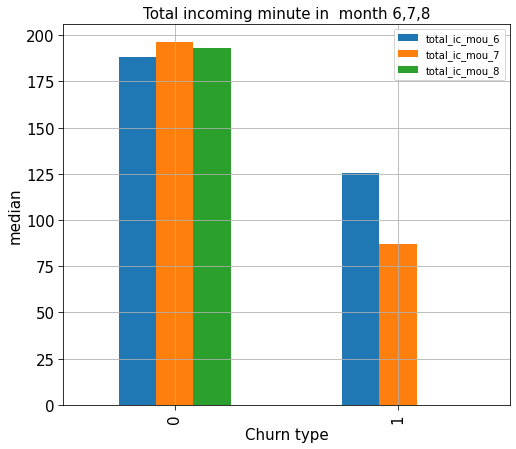

In [77]:
#Plot to visualize total_ic_mou
numdf_high.groupby("churn_probability")["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].median().plot.bar(figsize=[8,7])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Total incoming minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- incoming call are zero for 8th month and they are more likely to curn

Text(0.5, 1.0, 'local outgoing  minute in  month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

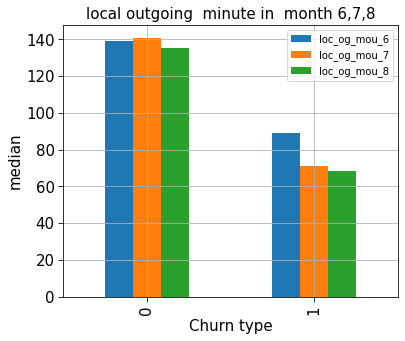

In [78]:
#plot to visualize local outgoing
numdf_high.groupby("churn_probability")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

-- user with lower local outgoing call are more likely to churn -- month over month decreases

Text(0.5, 1.0, 'local outgoing  minute in  month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

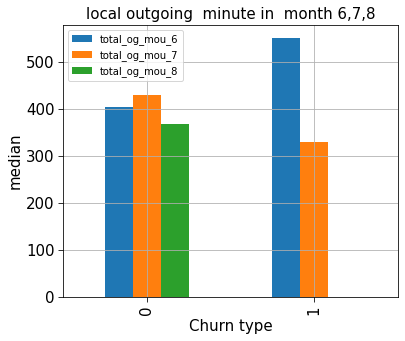

In [80]:
# tota out going
numdf_high.groupby("churn_probability")["total_og_mou_6","total_og_mou_7","total_og_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

-total outgoing minues are decreasing from 6 to 7 and user are more likey to churn

Text(0.5, 1.0, 'local outgoing  minute in same operator in  month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

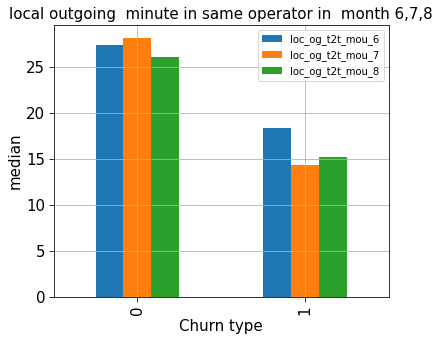

In [82]:
# local outgoing in same operator
numdf_high.groupby("churn_probability")["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("local outgoing  minute in same operator in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

-local outgoing in same operator does not have any evidence on churn

Text(0.5, 1.0, 'Local outgoing  minute to other operator in  month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

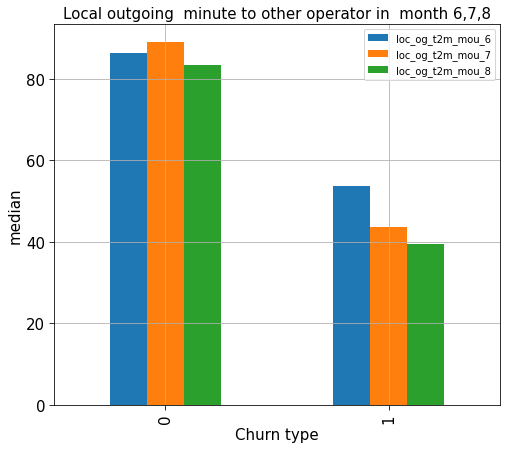

In [83]:
# Local outgoing to other operators
numdf_high.groupby("churn_probability")["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"].median().plot.bar(figsize=[8,7])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Local outgoing  minute to other operator in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

- Local outgoing to other operators are less then there is more likely to charge off

Text(0.5, 1.0, 'STD calls in  month 6,7,8')

Text(0, 0.5, 'median')

Text(0.5, 0, 'Churn type')

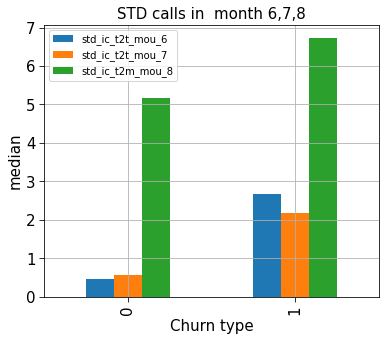

In [85]:
#STD calls
numdf_high.groupby("churn_probability")["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"].median().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("STD calls in  month 6,7,8",fontsize=15)
plt.ylabel("median",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

-customer use more STD calls are more likely to churn

Text(0.5, 1.0, 'Roaming Incoming call for month 6,7,8')

Text(0, 0.5, 'mean')

Text(0.5, 0, 'Churn type')

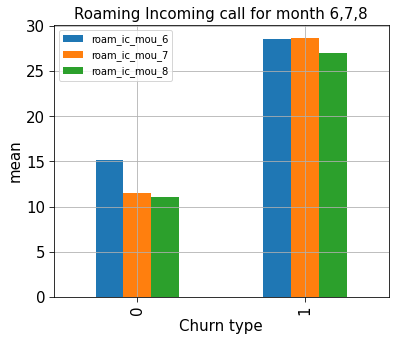

In [88]:
# Roaming Incoming calls for months 6 to 8

numdf_high.groupby("churn_probability")["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"].mean().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Roaming Incoming call for month 6,7,8",fontsize=15)
plt.ylabel("mean",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

-Roaming incoming calls are more for churn customer for 8th month

Text(0.5, 1.0, 'Roaming outgoing call for month 6,7,8')

Text(0, 0.5, 'mean')

Text(0.5, 0, 'Churn type')

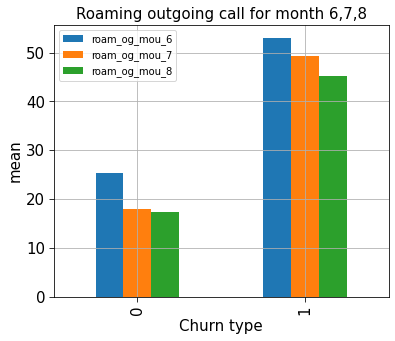

In [89]:
# Roaming outgoing calls for months 6 to 8

numdf_high.groupby("churn_probability")["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"].mean().plot.bar(figsize=[6,5])
plt.tick_params(size=5,labelsize = 15) 
plt.title("Roaming outgoing call for month 6,7,8",fontsize=15)
plt.ylabel("mean",fontsize=15)
plt.xlabel("Churn type",fontsize=15)
plt.grid(0.3)
plt.show()

-Roaming outgoing minutes are more causes higher probability of churn

In [90]:
#list of diff  columns created
univ = [col for col in numdf_high.columns if 'diff' in col]
univ

['arpu_diff',
 'onnet_mou_diff',
 'offnet_mou_diff',
 'roam_ic_mou_diff',
 'roam_og_mou_diff',
 'loc_og_mou_diff',
 'std_og_mou_diff',
 'isd_og_mou_diff',
 'spl_og_mou_diff',
 'total_og_mou_diff',
 'loc_ic_mou_diff',
 'std_ic_mou_diff',
 'isd_ic_mou_diff',
 'spl_ic_mou_diff',
 'total_ic_mou_diff',
 'total_rech_num_diff',
 'total_rech_amt_diff',
 'max_rech_amt_diff',
 'total_rech_data_diff',
 'max_rech_data_diff',
 'av_rech_amt_data_diff',
 'vol_2g_mb_diff',
 'vol_3g_mb_diff']

In [91]:
len(univ)

23

<Figure size 2160x2880 with 0 Axes>

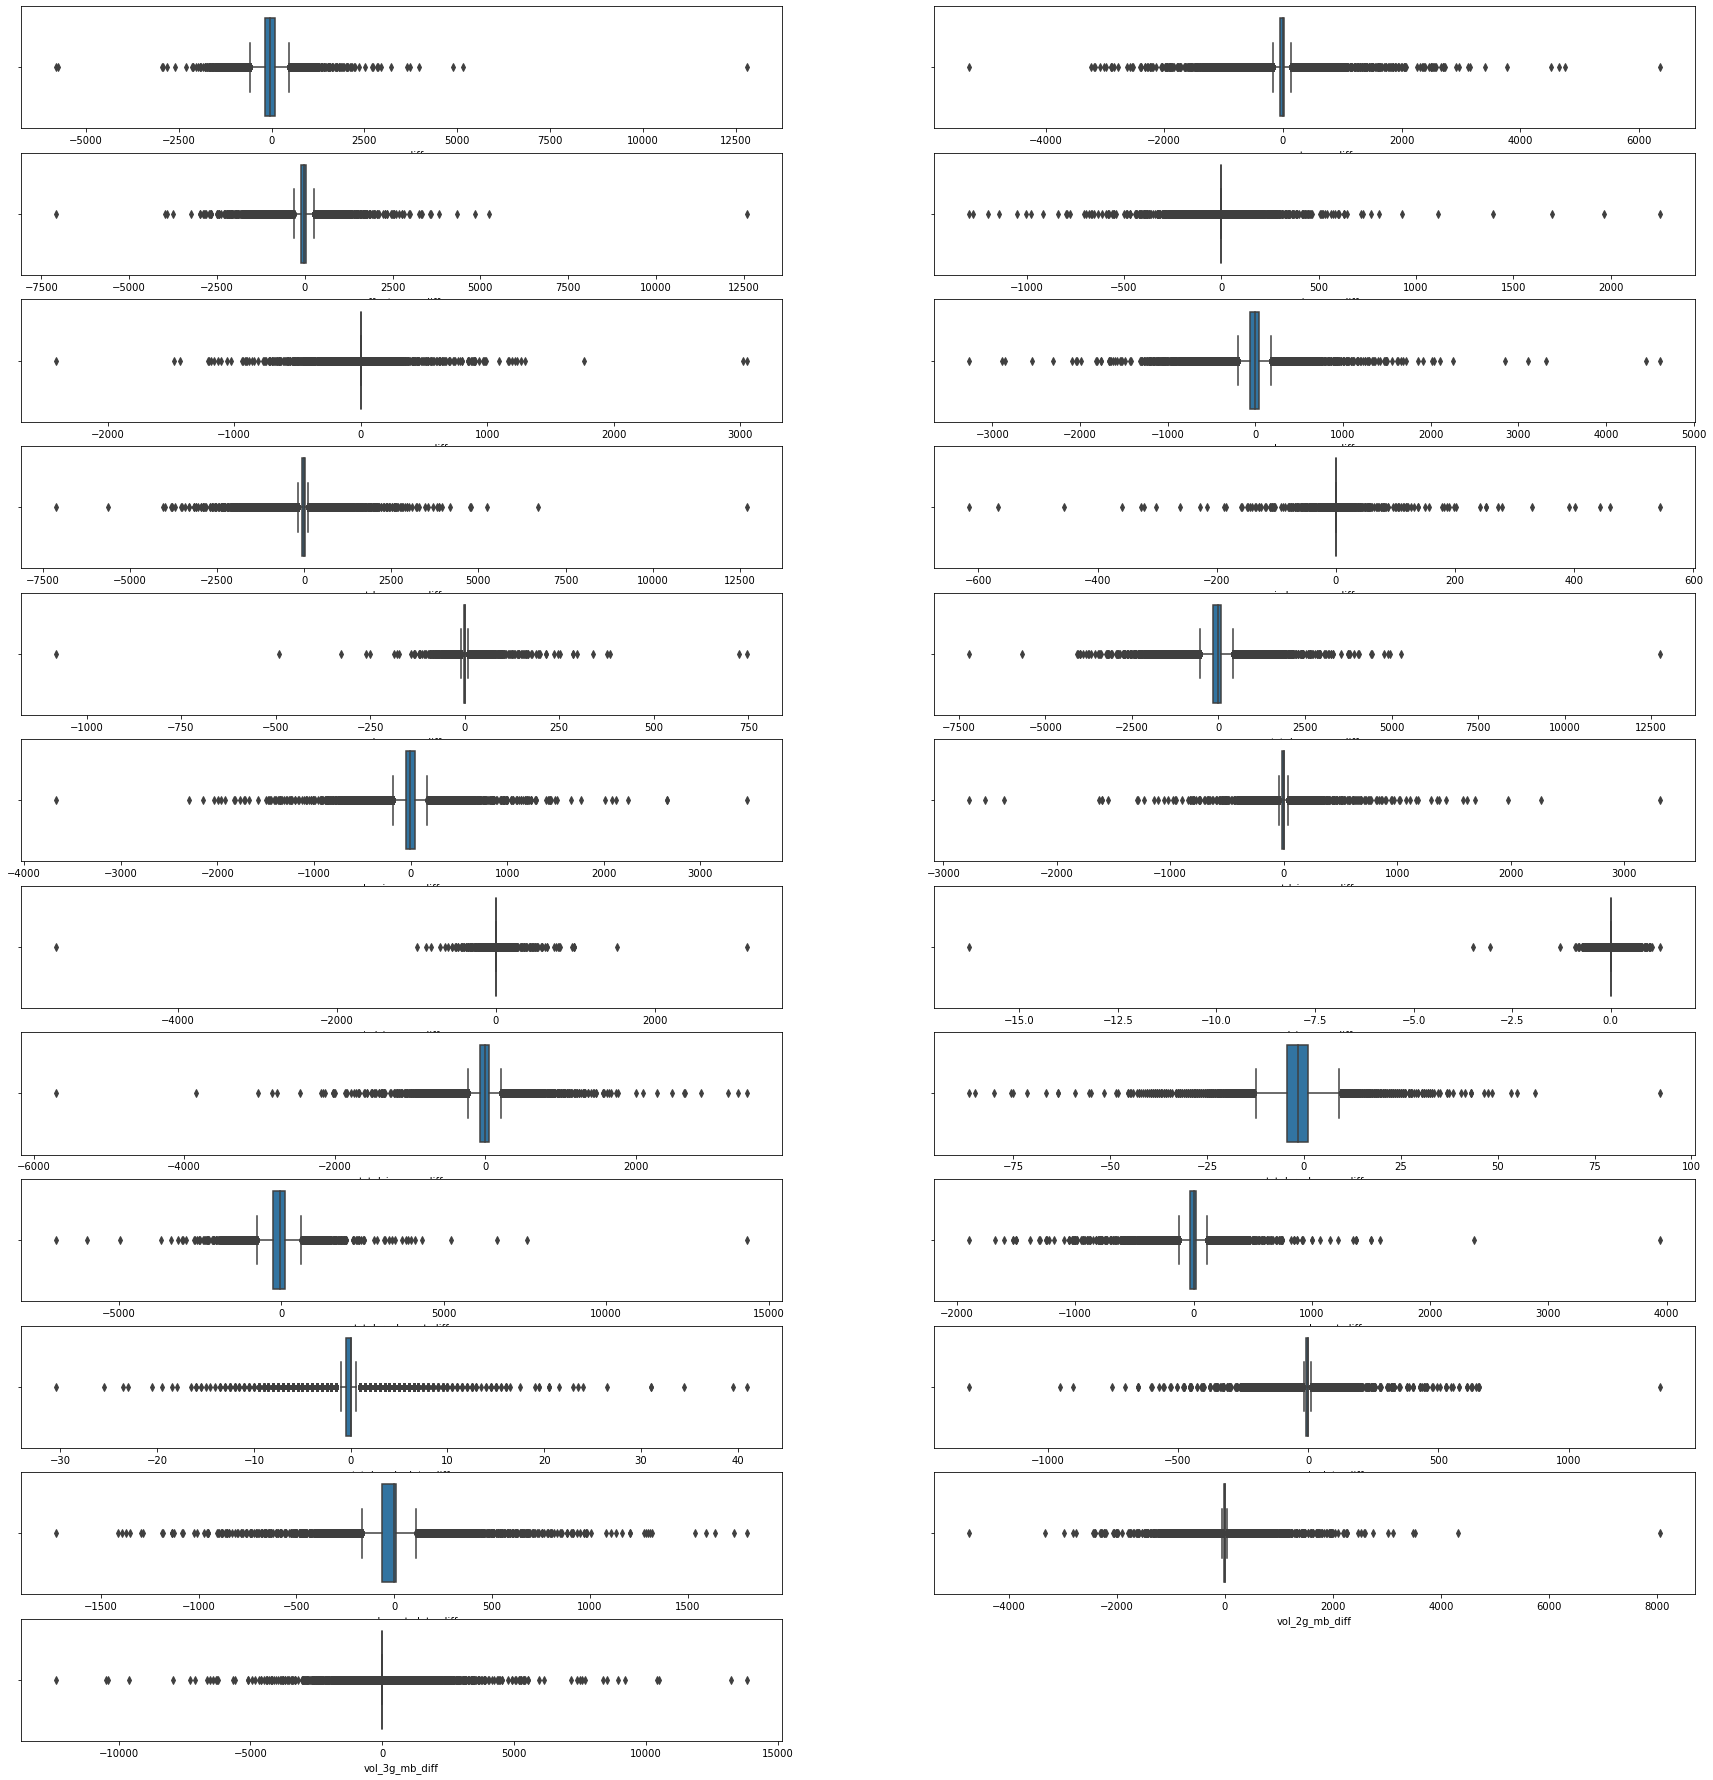

In [93]:
#plotting the colums of difference 6,7 of 8th month
plt.figure(figsize=(30,40))
for i in enumerate (univ):
    plt.subplot(15,2,i[0]+1)
    sns.boxplot(x=i[1], data=numdf_high)

### Categorical Data Analysis 

In [94]:
telchurn_highval['churn_probability'].head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [95]:
# create column name list by types of columns

cats =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

ids = ['id','circle_id']

dates = [x for x in telchurn_highval.columns if 'date' in x]

cats.append('churn_probability')

nums = [column for column in telchurn_highval.columns if column not in cats+ ids + dates]


# Check number of columns in each list
print("ID columns:", len(ids))
print("Date columns:" , len(dates))
print("Categorical columns:" , len(cats))
print("Numerical columns:", len(nums))

ID columns: 2
Date columns: 0
Categorical columns: 7
Numerical columns: 165


In [96]:
def capping(arr, k=3):
    ulimit = arr.mean() + k*arr.std()
    llimit = arr.mean() - k*arr.std()
    arr[arr<llimit] = llimit
    arr[arr>ulimit] = ulimit
    return arr

In [97]:
# Capping the outliers using function written earlier

telchurn_highval[nums] = telchurn_highval[nums].apply(capping, axis=0)

In [98]:
#check first 5 rows after capping

telchurn_highval.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0   240.708  128.191  101.565   
1             0.0             0.0             0.0   580.549  377.294  338.286   
2             0.0             0.0             0.0  1130.948  905.506  479.762   
3             0.0             0.0             0.0   371.974  352.069  240.449   
4             0.0             0.0             0.0   390.489  350.985  421.300   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        21.28         4.83         6.13         56.99         38.11   
1        10.43        24.99       194.43        317.11        341.79   
2       859.53       372.71         0.89        293.46        450.11   
3        93.18        38.29        29.86        531.19        507.76   
4         8.58        11.48        12.68        133.16        158.73   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          9.63          53.64            0.0            0.0          15.73   
1        197.09           0.00            0.0            0.0           0.00   
2        386.91           0.00            0.0            0.0           0.00   
3        222.03           0.00            0.0            0.0           0.00   
4        182.83           0.00            0.0            0.0           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0            0.0            0.0         10.160000              4.83   
1            0.0            0.0         10.430000             24.99   
2            0.0            0.0        772.285709            372.71   
3            0.0            0.0         93.180000             38.29   
4            0.0            0.0          8.580000             11.48   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              6.13             36.74             19.88              4.61   
1            194.43            313.76            330.88            185.88   
2              0.89             79.79            424.63            378.01   
3             29.86            159.29            219.44             99.86   
4             12.68             96.91            149.44            157.23   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0             11.99              1.23              5.01               0.0   
1              3.26             10.91              4.94               0.0   
2             11.58             25.43              8.88               0.0   
3              0.00              0.00              0.00               0.0   
4             33.71              9.28             25.59               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0              9.85              0.00         58.91         25.94   
1              0.00              0.00        327.46        366.79   
2              0.00              0.00        950.91        822.78   
3              0.00              0.36        252.48        257.74   
4              0.00              0.00        139.21        170.21   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0         15.76               0.0               0.0               0.0   
1        385.26               0.0               0.0               0.0   
2        387.79               0.0               0.0               0.0   
3        129.73               0.0               0.0               0.0   
4        195.51               0.0               0.0               0.0   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0              4.35              0.00              0.00               0.0   
1              0.00              0.00              0.00               0.0   
2            202.08              0.00              0.00               0.0   
3            371.89            288.31            121.79               0.0   
4              2

### Moeling

In [99]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Data PreProcessing

### Test Train Split

In [100]:
# divide data into train and test
X = telchurn_highval.drop("churn_probability", axis = 1)
y = telchurn_highval.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [101]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(15759, 171)

(15759,)

(5254, 171)

(5254,)

### Aggregating Categorica columns

In [103]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn_probability.mean()
train.groupby('night_pck_user_7').churn_probability.mean()
train.groupby('night_pck_user_8').churn_probability.mean()
train.groupby('fb_user_6').churn_probability.mean()
train.groupby('fb_user_7').churn_probability.mean()
train.groupby('fb_user_8').churn_probability.mean()

night_pck_user_6
-1.0    0.100115
 0.0    0.067670
 1.0    0.121359
Name: churn_probability, dtype: float64

night_pck_user_7
-1.0    0.116579
 0.0    0.056937
 1.0    0.054455
Name: churn_probability, dtype: float64

night_pck_user_8
-1.0    0.141948
 0.0    0.030765
 1.0    0.021622
Name: churn_probability, dtype: float64

fb_user_6
-1.0    0.100115
 0.0    0.074419
 1.0    0.068495
Name: churn_probability, dtype: float64

fb_user_7
-1.0    0.116579
 0.0    0.065248
 1.0    0.056163
Name: churn_probability, dtype: float64

fb_user_8
-1.0    0.141948
 0.0    0.078498
 1.0    0.024943
Name: churn_probability, dtype: float64

In [104]:
# Map categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [105]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cats if col not in ['churn_probability']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 13528 to 20561
Data columns (total 6 columns):
night_pck_user_6    15759 non-null float64
night_pck_user_7    15759 non-null float64
night_pck_user_8    15759 non-null float64
fb_user_6           15759 non-null float64
fb_user_7           15759 non-null float64
fb_user_8           15759 non-null float64
dtypes: float64(6)
memory usage: 861.8 KB


## PCA

In [106]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

0       11.44
1       20.92
2       26.75
3       31.67
4       35.68
5       39.36
6       42.12
7       44.73
8       47.10
9       49.25
10      51.30
11      53.23
12      55.01
13      56.71
14      58.35
15      59.82
16      61.20
17      62.56
18      63.90
19      65.22
20      66.41
21      67.59
22      68.70
23      69.78
24      70.80
25      71.80
26      72.77
27      73.69
28      74.59
29      75.49
30      76.34
31      77.17
32      77.99
33      78.80
34      79.57
35      80.33
36      81.05
37      81.76
38      82.41
39      83.06
40      83.68
41      84.25
42      84.79
43      85.33
44      85.85
45      86.34
46      86.82
47      87.29
48      87.74
49      88.18
50      88.57
51      88.95
52      89.32
53      89.69
54      90.04
55      90.39
56      90.72
57      91.04
58      91.35
59      91.66
60      91.96
61      92.25
62      92.54
63      92.82
64      93.10
65      93.37
66      93.62
67      93.87
68      94.10
69      94.33
70      94.55
71    

#### We can see that 90% variance is at 55th level
#### 99% at 104th level

<Figure size 630x360 with 0 Axes>

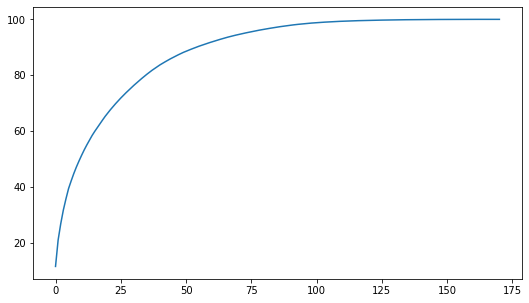

In [107]:
# Feature variance visualization

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

In [108]:
sc = StandardScaler()
sc.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [109]:
#Use PCA for components=55
pc = PCA(n_components = 55)
pc.fit(X_train, y_train)

PCA(copy=True, iterated_power='auto', n_components=55, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [110]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [111]:
# predict churn on test data
y_pred = logreg.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# check area under curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[4082  737]
 [  75  360]]
Accuracy :  0.8454510848877046
Sensitivity :  0.8470637061631043
Specificity :  0.8275862068965517
AUC:    	 0.9


### Hyperparameter tuning - PCA and Logistic Regression

In [112]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.917254
1    0.082746
Name: churn_probability, dtype: float64

In [113]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [114]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 18.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight={0: ...y='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [115]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       38.182572      5.583540         0.180756        0.027320   
1       68.197912      8.363062         0.320608        0.158068   
2       28.774645      8.272020         0.230050        0.182500   
3       42.420647      5.642990         0.159225        0.034323   
4       57.522380     12.671340         0.195101        0.048372   
5       59.423672      8.918870         0.339307        0.238722   
6       51.746780     15.593670         0.125398        0.044903   
7       28.552214      7.721383         0.155000        0.053400   
8       46.527109      4.339028         0.202933        0.070092   
9       33.067652     10.298164         0.109805        0.027285   
10      16.040765      1.026443         0.127561        0.056085   
11      31.254125      6.493206         0.131602        0.027824   
12      21.659420      0.854896         0.116598        0.059962   
13      27.809482      4.312851         0.113201        0.014769   
14      15.639803      2.925142         0.106201        0.027168   
15      18.567097      1.717653         0.113599        0.026128   
16      13.412106      1.074058         0.080600        0.016835   
17      14.572011      0.805944         0.104600        0.025301   
18      15.655753      2.399150         0.095229        0.020257   
19      15.449911      1.017255         0.138598        0.055550   
20      16.272059      0.599921         0.102800        0.015616   
21      16.911701      0.796234         0.106799        0.036893   
22      15.220309      1.995649         0.102398        0.014331   
23      17.032162      2.079557         0.097199        0.028613   
24      14.919018      1.017657         0.088399        0.019652   
25      15.069315      2.645039         0.114197        0.017981   
26      17.754792      4.984948         0.113155        0.028037   
27      18.041377      3.262641         0.101400        0.022666   
28      12.003928      1.080530         0.071799        0.010224   
29      14.283004      1.936384         0.099230        0.014991   
30      14.736825      1.818694         0.088401        0.018118   
31      12.909750      3.813787         0.095000        0.054121   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [116]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8823702322338398
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [117]:
# predict churn on test data
y_pred = model.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[[4016  803]
 [  89  346]]
Accuracy :  0.8454510848877046
Sensitivity :  0.8333679186553227
Specificity :  0.7954022988505747
AUC:    	 0.88


### Random Forest

In [118]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [119]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [120]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.882845070174749
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [121]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4734   85]
 [ 250  185]]
Accuracy :  0.9362390559573658
Sensitivity :  0.9823614857854327
Specificity :  0.42528735632183906
AUC:    	 0.88


- Sensitivity, accuarcy are high for Model with Randmon Forest

## ii) Choosing best features

In [122]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [123]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   37.7s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features=13,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=4,
            verbose=1, warm_start=False)

In [124]:
# OOB score
rf_model.oob_score_

0.9422552192397995

In [125]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

total=sum(sum(cm))
#from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)


# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


[[4747   72]
 [ 254  181]]
Accuracy :  0.9379520365435858
Sensitivity :  0.9850591409006018
Specificity :  0.4160919540229885
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


-Highest Accuracy and AUC, sensitivity model with Random Forest

### Feature Importance

In [126]:
# predictors
features = telchurn_highval.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0           total_ic_mou_8               5.697198
1            roam_og_mou_8               4.615155
2            roam_ic_mou_8               4.582276
3                   arpu_8               3.922386
4           total_og_mou_8               3.571740
5      total_rech_amt_diff               3.104643
6                arpu_diff               2.565289
7           max_rech_amt_8               2.454633
8         loc_ic_t2m_mou_8               2.430109
9             loc_ic_mou_8               2.287991
10        total_rech_amt_8               2.256977
11      last_day_rch_amt_8               2.205492
12       total_ic_mou_diff               2.056832
13        roam_og_mou_diff               1.707930
14       total_og_mou_diff               1.699830
15        roam_ic_mou_diff               1.493999
16        loc_og_t2m_mou_8               1.402413
17             og_others_8               1.242832
18            loc_og_mou_8               1.081069
19         loc_ic_mou_diff               1.050882
20      av_rech_amt_data_8               0.982974
21         std_og_mou_diff               0.968295
22     total_rech_num_diff               0.955376
23        loc_ic_t2t_mou_8               0.890042
24       max_rech_amt_diff               0.847462
25             vol_2g_mb_8               0.842376
26            offnet_mou_8               0.707466
27         std_ic_mou_diff               0.688375
28         max_rech_data_8               0.670252
29               fb_user_8               0.669924
30        total_rech_num_8               0.650676
31                     aon               0.646247
32         loc_og_mou_diff               0.643972
33          total_ic_mou_7               0.641221
34   av_rech_amt_data_diff               0.628902
35            isd_og_mou_8               0.614458
36             onnet_mou_8               0.606336
37          total_ic_mou_6               0.601798
38          onnet_mou_diff               0.582750
39         offnet_mou_diff               0.579987
40       total_rech_data_8               0.566975
41                  arpu_6               0.547710
42            loc_og_mou_7               0.542581
43          total_og_mou_7               0.520358
44        total_rech_amt_7               0.510334
45          vol_2g_mb_diff               0.498349
46                  arpu_7               0.495785
47        loc_ic_t2m_mou_6               0.492145
48            std_og_mou_6               0.486140
49        loc_og_t2t_mou_8               0.480398
50           roam_og_mou_7               0.474997
51             vol_3g_mb_8               0.469115
52            loc_ic_mou_6               0.469084
53      max_rech_data_diff               0.467040
54            spl_ic_mou_8               0.466716
55        total_rech_amt_6               0.458127
56        loc_og_t2f_mou_8               0.454880
57        loc_og_t2m_mou_7               0.447073
58            loc_ic_mou_7               0.446657
59          total_og_mou_6               0.440596
60            offnet_mou_7               0.438331
61        loc_og_t2m_mou_6               0.437929
62            std_og_mou_7               0.419232
63        loc_ic_t2f_mou_8               0.413516
64            std_og_mou_8               0.412515
65        total_rech_num_7               0.412220
66        loc_ic_t2t_mou_6               0.409205
67            std_ic_mou_8               0.405710
68            loc_og_mou_6               0.405601
69         spl_og_mou_diff               0.405530
70        total_rech_num_6               0.405274
71        loc_ic_t2m_mou_7               0.399355
72        std_ic_t2m_mou_8               0.392411
73        loc_ic_t2t_mou_7               0.381232
74            offnet_mou_6               0.379776
75          vol_3g_mb_diff               0.379628
76             onnet_mou_7               0.374853
77            std_ic_mou_7               0.371645
78        night_pck_user_8               0.366109
79        std_ic_

### Top 30 features

In [127]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

Text(0, 0.5, 'Coefficient Percentage in Overall 30 Features')

Text(0.5, 0, 'Features')

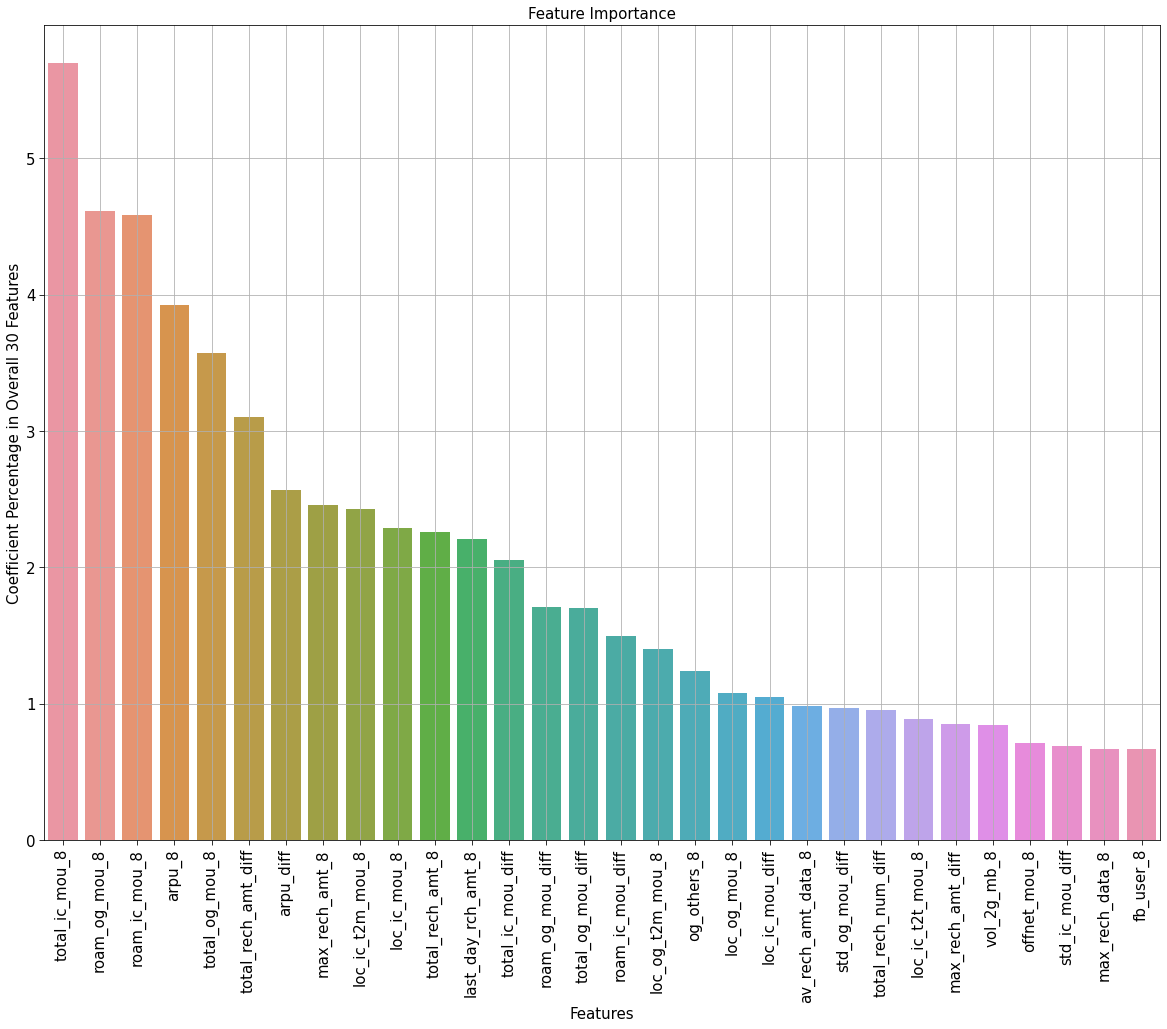

In [139]:
# feature importance

plt.figure(figsize=[20,15])
sns.barplot(x = "variables",y="importance_percentage",data=feature_importance.head(30))
plt.title("Feature Importance",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Coefficient Percentage in Overall 30 Features",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

<Figure size 1200x1000 with 0 Axes>

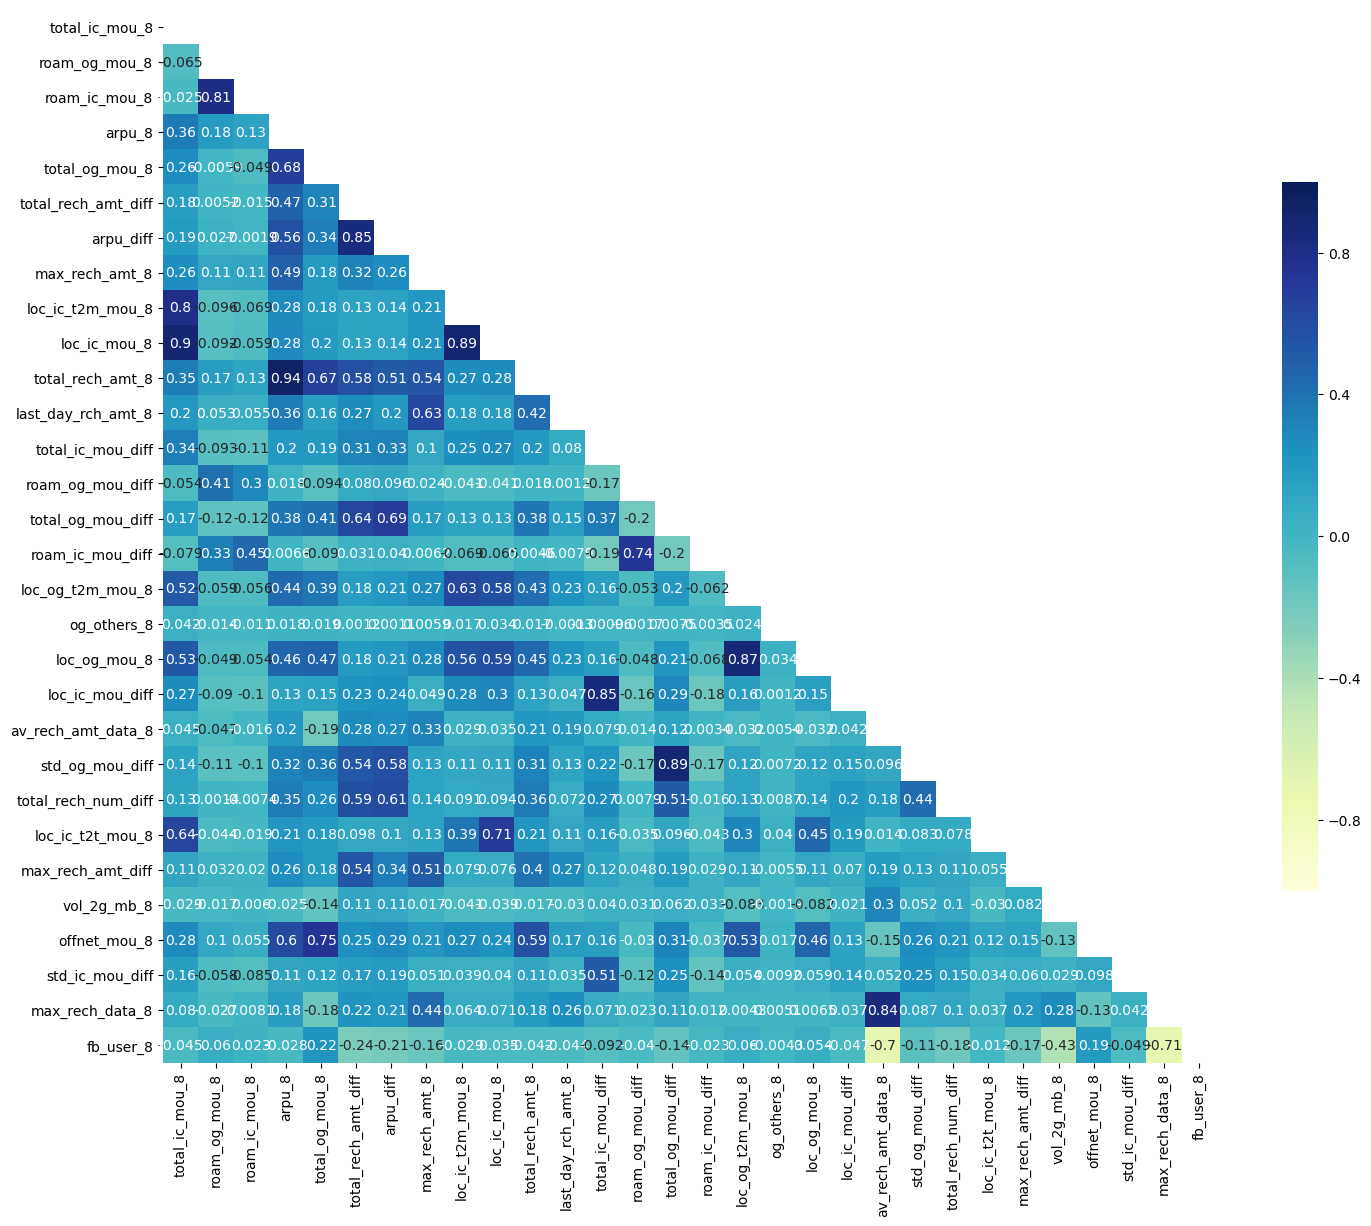

In [128]:
# Create a Correlation heatmap to know how the variables are related to each other
plt.figure(figsize = (12,10), dpi=100)
my_mask_1 = np.triu(np.ones_like(X_train[top_features].corr(), dtype =np.bool))

f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=100)
ax_corr1 = sns.heatmap(data = X_train[top_features].corr(), cmap= 'YlGnBu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0, square=True, mask=my_mask_1, annot=True)
plt.tight_layout()
plt.autoscale();
plt.show();

In [140]:
# plot feature correlation
#import seaborn as sns
#plt.rcParams["figure.figsize"] =(10,10)
#mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
#sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [130]:
# Top features are:

top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [131]:
# logistic regression model
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [132]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   45.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight={0: 0.1, 1: 0.9}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [133]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8853068662947307
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l1'}


In [134]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


total=sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy1=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)


# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4045  774]
 [  93  342]]
Accuracy :  0.9379520365435858
Sensitivity :  0.8393857646814692
Specificity :  0.7862068965517242
ROC:    	 0.88


- Sensitivity drop little bit but specificity has increased, ROC also compromised a bit

### Extract the intercept and the coefficients from the logistic model 

In [135]:
logistic_model = model.best_estimator_.named_steps['logistic']
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  total_ic_mou_8  total_rech_amt_diff  total_og_mou_8    arpu_8  \
0  -1.651133       -1.179006            -0.730021       -1.961698  0.180396   

   roam_ic_mou_8  roam_og_mou_8  std_ic_mou_8  av_rech_amt_data_8  \
0       0.007716       0.236236      0.237122             -0.6958   

   std_og_mou_8  
0       1.50566

## Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 

In [161]:
# Create DataFrame of the testst data set with top features

test_df=pd.read_csv("test.csv")


In [162]:
test_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [170]:
top_features

['total_ic_mou_8',
 'total_rech_amt_diff',
 'total_og_mou_8',
 'arpu_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'std_ic_mou_8',
 'av_rech_amt_data_8',
 'std_og_mou_8']

- total_rech_amt_diff : is a derived variable so need to consider the originals vars as well

In [171]:
# Total vars for the test dataset
var_list= ['total_ic_mou_8',  'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8',
         'std_og_mou_8', 'total_rech_amt_8','total_rech_amt_6','total_rech_amt_7']

In [172]:
test_df1=test_df.loc[ :, var_list]
test_df1.shape
test_df1.head()

(30000, 11)

total_ic_mou_8  total_og_mou_8   arpu_8  roam_ic_mou_8  roam_og_mou_8  \
0           36.26           57.94   64.445           0.00           0.00   
1          281.66          415.59  360.868           0.00           0.00   
2            0.00            0.00  746.239          26.08          54.44   
3          549.13           24.01   24.400           0.00           0.00   
4          159.26          779.78  413.329           0.00           0.00   

   std_ic_mou_8  av_rech_amt_data_8  std_og_mou_8  total_rech_amt_8  \
0          4.34                 NaN         28.48                60   
1          0.00                 NaN         17.68               500   
2          0.00                 NaN          0.00              1000   
3          8.83                 NaN          0.00                 0   
4        141.48                 NaN        749.29               546   

   total_rech_amt_6  total_rech_amt_7  
0               103                90  
1               500               500  
2               500              1000  
3               110               260  
4               356               490

In [173]:
# Missing value percentage in each column
test_df1.isnull().sum()*100/test_df1.shape[0]

total_ic_mou_8         0.000000
total_og_mou_8         0.000000
arpu_8                 0.000000
roam_ic_mou_8          5.583333
roam_og_mou_8          5.583333
std_ic_mou_8           5.583333
av_rech_amt_data_8    73.593333
std_og_mou_8           5.583333
total_rech_amt_8       0.000000
total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
dtype: float64

In [174]:

# Fill with zeros
test_df2 = test_df1.apply(lambda x: x.fillna(0))


In [175]:

# Missing value percentage in each column
test_df2.isnull().sum()*100/test_df2.shape[0]

total_ic_mou_8        0.0
total_og_mou_8        0.0
arpu_8                0.0
roam_ic_mou_8         0.0
roam_og_mou_8         0.0
std_ic_mou_8          0.0
av_rech_amt_data_8    0.0
std_og_mou_8          0.0
total_rech_amt_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
dtype: float64

- Variable creation

In [176]:
#drevied var 
test_df2['total_rech_amt_diff'] = test_df2.total_rech_amt_8 - ((test_df2.total_rech_amt_6 + test_df2.total_rech_amt_7)/2)


In [177]:

#missing value 
test_df2.isnull().sum()*100/test_df2.shape[0]

total_ic_mou_8         0.0
total_og_mou_8         0.0
arpu_8                 0.0
roam_ic_mou_8          0.0
roam_og_mou_8          0.0
std_ic_mou_8           0.0
av_rech_amt_data_8     0.0
std_og_mou_8           0.0
total_rech_amt_8       0.0
total_rech_amt_6       0.0
total_rech_amt_7       0.0
total_rech_amt_diff    0.0
dtype: float64

In [188]:
# now drop the variable : total_rech_amt_6 total_rech_amt_7 total_rech_amt_8
test_df3=test_df2
test_df2.drop([ 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'] ,axis=1, inplace=True)
test_df2

total_ic_mou_8  total_og_mou_8   arpu_8  roam_ic_mou_8  roam_og_mou_8  \
0               36.26           57.94   64.445           0.00           0.00   
1              281.66          415.59  360.868           0.00           0.00   
2                0.00            0.00  746.239          26.08          54.44   
3              549.13           24.01   24.400           0.00           0.00   
4              159.26          779.78  413.329           0.00           0.00   
...               ...             ...      ...            ...            ...   
29995          663.88          507.38  406.150           0.00           0.00   
29996           81.93          840.03  374.981           0.00           0.00   
29997           20.36           49.64  180.194          24.59          15.58   
29998            9.26          332.63  257.439           0.00           0.00   
29999          261.64          218.11  605.320         141.78         179.84   

       std_ic_mou_8  av_rech_amt_data_8  std_og_mou_8  total_rech_amt_diff  
0              4.34                 0.0         28.48                -36.5  
1              0.00                 0.0         17.68                  0.0  
2              0.00                 0.0          0.00                250.0  
3              8.83                 0.0          0.00               -185.0  
4            141.48                 0.0        749.29                123.0  
...             ...                 ...           ...                  ...  
29995         27.59                 0.0         30.01               -174.0  
29996         23.14                 0.0        813.83                188.5  
29997          4.28                 0.0         15.34                165.0  
29998          0.00                 0.0        303.86               -774.0  
29999         93.44               504.0        186.61               -440.0  

[30000 rows x 9 columns]

In [189]:
X_test=test_df2
X_test.shape

(30000, 9)

In [190]:
#Scaling 

sc = StandardScaler()
sc.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [194]:
# predict churn on test data
y_pred = model.predict(X_test)


In [202]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

- Create DataFrame from numpy array -- y_pred

In [203]:
# Creat column churn_probability
column_values=['churn_probability']

df=pd.DataFrame(data=y_pred, columns=column_values)
df.head()


churn_probability
0                  0
1                  0
2                  0
3                  0
4                  0

In [207]:
df['row_num'] = df.reset_index().index
df.head()

churn_probability  row_num
0                  0        0
1                  0        1
2                  0        2
3                  0        3
4                  0        4

In [211]:
#Merge the above data frame with id columnn from the test data
test_df_id=test_df.loc[ :, 'id']



In [212]:
test_df_id['row_num'] = test_df_id.reset_index().index

In [219]:
test_df_id.index # it has index name as row_num

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,
       ...
           29991,     29992,     29993,     29994,     29995,     29996,
           29997,     29998,     29999, 'row_num'],
      dtype='object', length=30001)

In [225]:
# using .merge() functio

df_out=pd.merge(test_df_id, df, left_index=True, right_index=True)                
 

In [227]:
df_out.drop('row_num', axis=1, inplace=True)
df_out.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [230]:
# Create solution file in csv format
df_out.to_csv('solution.csv')

In [231]:
len(df_out)

30000